# Here there is Only the Cleaning of the Model

In [1]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import KNNImputer


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
inverse_mapper = {0:1, 1:0}

data = df2_result_rand.iloc[10][1]
data

inverse_mapper[data]

1

In [27]:
df1_result_DL = pd.read_csv('DL_test.csv')
df2_result_rand  = pd.read_csv('Random_Forest_Classifier_last3.csv')



In [28]:
my_dict = {}
for row_i in range(df1_result_DL.shape[0]):
    if df1_result_DL.iloc[row_i][1] == df2_result_rand.iloc[row_i][1]:
        #print(round(int(df1_result_DL .iloc[row_i][0]), 0))
        my_dict[row_i] = [int(df1_result_DL.iloc[row_i][0]),  df1_result_DL.iloc[row_i][1]]

        
    if df1_result_DL.iloc[row_i][1] != df2_result_rand.iloc[row_i][1]:
        #print(0)
        inverse_mapper = {0:1, 1:0}
        data = df1_result_DL.iloc[row_i][1]
        my_dict[row_i] = [int(df1_result_DL.iloc[row_i][0]),  float(np.random.choice([0,1]))] # float(np.random.choice([0,1]))  # float(inverse_mapper[data])


In [24]:
df4_result_endamble.isna().sum()

ID                    0
Overall_Experience    0
dtype: int64

In [29]:
df4_result_endamble = pd.DataFrame(my_dict).T
df4_result_endamble.rename(columns={0:'ID', 1:'Overall_Experience'}, inplace=True)
df4_result_endamble['ID'] = df4_result_endamble['ID'].astype(int)
df4_result_endamble

,ID,Overall_Experience
0,99900001,1.0
1,99900002,1.0
2,99900003,1.0
3,99900004,0.0
4,99900005,1.0
...,...,...
35597,99935598,0.0
35598,99935599,1.0
35599,99935600,1.0
35600,99935601,1.0


In [30]:
df4_result_endamble.to_csv('Ensamble_Test.csv', index=None)

In [7]:
df4_result_endamble.isna().sum()

ID                    0
Overall_Experience    0
dtype: int64

In [42]:
float(np.random.choice([0,1]))

1.0

In [30]:
(1331/35602)*100

3.7385540138194484

In [34]:
np.random.rand(3)

array([0.38352517, 0.91999165, 0.41722423])

In [2]:
df1_test = pd.read_csv('Surveydata_test_cleaned_v2.csv')
df2_test = pd.read_csv('Traveldata_test_cleaned_v2.csv')

df_union_test = pd.merge(df1_test, df2_test, on = 'ID')
del df_union_test['Unnamed: 0_x']
del df_union_test['Unnamed: 0_y']

df_union_test.shape

(35602, 24)

In [3]:
df1_train = pd.read_csv('Surveydata_train_cleaned_v2.csv')
df2_train = pd.read_csv('Traveldata_train_cleaned_v2.csv')

df_union_train = pd.merge(df1_train, df2_train, on = 'ID')
del df_union_train['Unnamed: 0_x']
del df_union_train['Unnamed: 0_y']

df_union_train.shape

(94379, 25)

In [4]:
df_union_train.isna().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [5]:
df_union_test.isna().sum()

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

# Let's Start with the Pipeline§

In [6]:
# Creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.1f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [7]:
def accuracy(y_train_test, y_pred_train_test):
    cm = confusion_matrix(y_train_test, y_pred_train_test)
    tot = sum(sum(cm))
    zero = cm[0][0]
    one = cm[1][1]

    accuracy = (one + zero)/tot
    return accuracy

### THE True Train and Test

In [8]:
X_train = df_union_train.drop(['ID',"Overall_Experience"], axis=1) # keep it as a Matrix
y_train = df_union_train["Overall_Experience"]  # keep it as an array

X_train.shape

(94379, 23)

In [9]:
X_test = df_union_test.drop(['ID'], axis=1) # keep it as a Matrix

X_test.shape

(35602, 23)

### SPLIT THE TRAIN SET in further Train-Train to check 

In [10]:
X_train_train ,X_train_test , y_train_train, y_train_test = train_test_split(X_train , y_train, test_size=0.3, random_state=5, stratify= y_train)

In [13]:
numeric_features_min_max = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering','Platform_Location', 'Onboard_Wifi_Service', 
                            'Onboard_Entertainment','Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 
                            'CheckIn_Service', 'Cleanliness','Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel','Travel_Class']

numeric_features_standard = [   'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']


numeric_transformer = Pipeline(
    steps = [ ('scaler1', MinMaxScaler() ), ('scaler2', StandardScaler() ), ('imputer', KNNImputer(n_neighbors=5) ) ] 
    # ('imputer', SimpleImputer(strategy='median') ), ADD LATER ON, , ('imputer',  IterativeImputer(random_state=0, initial_strategy='median')
)

# Here the pre-processor step
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric1", numeric_transformer, numeric_features_min_max ),
        ("numeric2", numeric_transformer, numeric_features_standard )
    ]
)

# here the Pipeline
pipe_rf = Pipeline(
    steps = [('preprocessor', preprocessor), ('regressor', GradientBoostingClassifier(criterion = 'squared_error', learning_rate=1, n_estimators=500, tol=0.001) ) ]
)


#pipe_rf.fit(X_train_train, y_train_train)

#y_pred_train_train = pipe_rf.predict(X_train_train)

#metrics_score(y_train_train, y_pred_train_train)


In [14]:
pipe_rf.fit(X_train_train, y_train_train)

y_pred_train_test = pipe_rf.predict(X_train_test)

#metrics_score(y_train_test, y_pred_train_test)
accuracy(y_train_test, y_pred_train_test)

0.9472699018153563

In [15]:
#pipe_rf.fit(X_train, y_train)

#y_pred_train = pipe_rf.predict(X_train)

#metrics_score(y_train, y_pred_train)

In [16]:
pipe_rf.fit(X_train, y_train)

y_pred_test = pipe_rf.predict(X_test)

#metrics_score(y_test, y_pred_test)
y_pred_test

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [17]:
df_final = df_union_test[['ID']]
df_final['Overall_Experience'] = y_pred_test

df_final

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1
...,...,...
35597,99935598,0
35598,99935599,1
35599,99935600,0
35600,99935601,1


In [18]:
df_final.to_csv('Gradient_Boosting_Classifier_last.csv',  index=False)

In [15]:
#pipe_rf.get_params()

In [16]:
pipe_param_grid = { 'regressor__ccp_alpha': [-1, 0.0],
 'regressor__criterion': ['squared_error'],
 'regressor__init': [None],
 'regressor__learning_rate': [0.1, 0.5],
 'regressor__loss': ['deviance'],
 'regressor__max_depth': [3],
 'regressor__max_features': [None],
 'regressor__max_leaf_nodes': [None],
 'regressor__min_impurity_decrease': [0.0],
 'regressor__min_samples_leaf': [1],
 'regressor__min_samples_split': [2],
 'regressor__min_weight_fraction_leaf': [0.0],
 'regressor__n_estimators': [100],
 'regressor__n_iter_no_change': [None],
 'regressor__random_state': [None],
 'regressor__subsample': [1.0],
 'regressor__tol': [0.0001, 0.001],
 'regressor__validation_fraction':[ 0.1],
 'regressor__warm_start': [False]
}

# 'regressor__n_estimators': [100], #### AS HIGH AS POSSIBLE


grid = GridSearchCV(pipe_rf, pipe_param_grid, cv=3 ,
                    verbose = 50 , n_jobs=-1)

grid.fit(X_train, y_train)

print('\nBest Accuracy Score : %.4f'%grid.best_score_, '\nBast Params: ', str(grid.best_params_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


              precision    recall  f1-score   support

           0       0.82      0.81      0.81     29950
           1       0.84      0.85      0.85     36115

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065



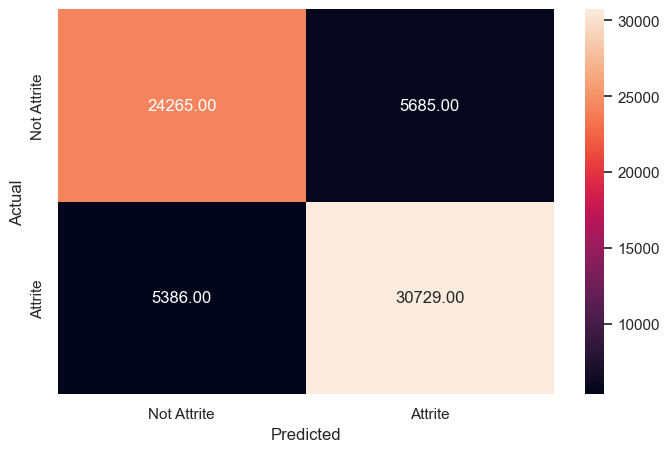

In [26]:
y_pred_train = grid.predict(X_train)

metrics_score(y_train, y_pred_train)

a